### Supplementary code

import sys
!{sys.executable} -m pip install xlrd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regression on whether data

Bayes classifier, Naive Bayes, MLE, MAP, Parzen, K-NN : all look like they are applicable or make sense for classification problem where y is discrete (giving class conditional densities) or probability notion(probabilistic models)

# KNN is possible (hold)

Here, Y/X is a random variable such that Y = f(X) + e, where e is the random noise. Thus if we consider probabilistic model for Y/X, we are essentially heading towards GLM.

Moreover it looks like we have only linear and polynomial regression at hand since binomial, logistic, etc regressions doesn't give y as we require

## 1. Dataset

### Assumption - last column is y. 
#### Data augmentation DONE
#### Data preprocessing - normalisation, shuffling required? 

In [33]:
data = pd.read_excel('./weather_data.xlsx').values
print(type(data), data.shape)

#augment dataset (X)
ones=np.ones((data.shape[0], 1))
data=np.hstack((ones,data))
print(type(data), data.shape)

X_train,y_train = data[:700,:-1],data[:700,-1:]
print(X_train.shape, y_train.shape)

X_test,y_test = data[700:,:-1],data[700:,-1:]
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'> (1000, 7)
<class 'numpy.ndarray'> (1000, 8)
(700, 7) (700, 1)
(300, 7) (300, 1)


# 2. Linear Model : y_ = w.T.dot(x)
1. Try different loss functions
2. Try with/without regularization
3. Give both analytical and numerical (grad descent) solution --> both SGD and GD

## 2.1. Loss function - MSE
https://en.wikipedia.org/wiki/Regularized_least_squares => no closed form solution for l1 and elastic net reg

In [3]:
def mse_loss(Y_true,Y_pred):
    return ((Y_true-Y_pred)**2).mean()

### 2.1.1. Analytical Solution - without regularization

In [73]:
def Get_W_NoReg(X,y):
    # can use pseudo inverse - it is more powerful in terms of its properties (mathematics)
    return (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)
w = Get_W_NoReg(X_train,y_train)

y_pred_train = X_train.dot(w)
y_pred_test = X_test.dot(w)

print("train loss", mse_loss(y_train,y_pred_train))
print("test loss", mse_loss(y_test,y_pred_test))

train loss 2.6659477003312415
test loss 3.508677050069661


### 2.1.2. Analytical Solution - with L2 regularization

In [74]:
def Get_W_L2_Reg(X,y,alpha):
    #alpha - regularisation constant
    return (np.linalg.inv(X.T.dot(X) + alpha*np.identity(7))).dot(X.T).dot(y)

for alpha in [1,2,4,8,16,32,64,128,256,512,1024]:
    w = Get_W_L2_Reg(X_train,y_train,alpha)

    y_pred_train = X_train.dot(w)
    y_pred_test = X_test.dot(w)
    
    print("alpha = ",alpha)
    print("train loss", mse_loss(y_train,y_pred_train))
    print("test loss", mse_loss(y_test,y_pred_test))
    print()

alpha =  1
train loss 2.666564058651518
test loss 3.5013604285433213

alpha =  2
train loss 2.666714594577347
test loss 3.5021565320325907

alpha =  4
train loss 2.6672566454626687
test loss 3.5040520800581256

alpha =  8
train loss 2.6692213072757003
test loss 3.5085930207036

alpha =  16
train loss 2.6758287545131836
test loss 3.5197331958656406

alpha =  32
train loss 2.695119009935035
test loss 3.5461330846884143

alpha =  64
train loss 2.7401632787210333
test loss 3.600539168632315

alpha =  128
train loss 2.817933719129681
test loss 3.688120194695212

alpha =  256
train loss 2.91365149296503
test loss 3.792110464229187

alpha =  512
train loss 3.000224596767973
test loss 3.885257257328915

alpha =  1024
train loss 3.0635168690196615
test loss 3.9553334097344526



### 2.1.3 Gradient Descent without regularizer

In [51]:
def mse_loss(Y_true,Y_pred):
    return ((Y_true-Y_pred)**2).mean()

def GradientDescent(X_train,y_train, X_test,y_test, epochs, lr):    
    train_error, test_error = [], []
    n,m=X_train.shape
    
    #initialise weights
    w = np.random.random((m,1))
    for _ in range(epochs):
        y_pred_train = X_train.dot(w)
        y_pred_test = X_test.dot(w)
        
        gradient = 2*((X_train.T).dot(y_pred_train - y_train)) / n
        
        w = w - lr * gradient
        
        train_error.append(mse_loss(y_train, y_pred_train))
        test_error.append(mse_loss(y_test, y_pred_test))
    
    print("train_error", train_error[-1],"test error",test_error[-1])
    plt.plot(train_error,label='train error')
    plt.plot(test_error,label='test error')
    plt.legend()
    plt.show()

Normalising the data (the original features in X) to avoid overflow or underflow

In [37]:
mean = X_train.mean(axis=0,keepdims=True)
stddev = X_train.std(axis=0,keepdims=True)
print(mean)
print(stddev)

[[1.00000000e+00 2.93814286e+01 4.92828571e+01 1.26957143e+01
  1.00992143e+03 3.00000000e-01 2.55714286e-01]]
[[ 0.         12.44055342 14.60205437  4.70564815  5.07214784  0.45825757
   0.43626195]]


In [38]:
mean[0,0]=0
stddev[0,0]=1
print(mean)
print(stddev)

[[0.00000000e+00 2.93814286e+01 4.92828571e+01 1.26957143e+01
  1.00992143e+03 3.00000000e-01 2.55714286e-01]]
[[ 1.         12.44055342 14.60205437  4.70564815  5.07214784  0.45825757
   0.43626195]]


train_error 9.916982593058299e+103 test error 1.1563652367210089e+104


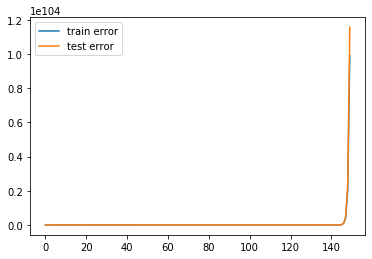

train_error 2.6659477004117265 test error 3.508676801252021


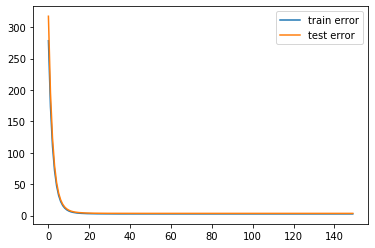

train_error 4.146263970843986 test error 5.177531252571185


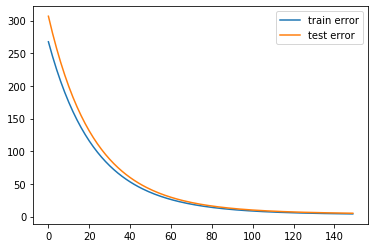

train_error 135.02258423422123 test error 153.41213515278787


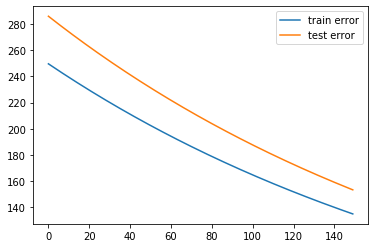

In [52]:
X = X_train - mean
Xt = X_test - mean
X = X/stddev
Xt = Xt/stddev

for lr in [1,.1,.01,.001]:
    GradientDescent(X, y_train, Xt, y_test, epochs=150, lr=lr)

### 2.1.3 Gradient Descent with regularizer
1. L2 - cost = ||Y-XW||^2/n + alpha*||w||^2 
2. L1, and thus elastic net, doesnt have differentiable cost function => No gradient descent

In [63]:
def regularized_mse_loss(y_true,y_pred, alpha, w):
    return ((y_true-y_pred)**2).mean() + alpha*(w.T.dot(w)[0,0])

def GradientDescent(X_train,y_train, X_test,y_test, epochs, lr, alpha):
    # alpha - reg constant
    
    train_error, test_error = [], []
    n,m=X_train.shape
    
    #initialise weights
    w = np.random.random((m,1))
    for _ in range(epochs):
        y_pred_train = X_train.dot(w)
        y_pred_test = X_test.dot(w)
        
        gradient = (2*((X_train.T).dot(y_pred_train - y_train)) / n) + 2*alpha*w
        
        w = w - lr * gradient
        
        train_error.append(regularized_mse_loss(y_train, y_pred_train, alpha, w))
        test_error.append(regularized_mse_loss(y_test, y_pred_test, alpha, w))
    
    print("train_error", train_error[-1],"test error",test_error[-1])
    plt.plot(train_error,label='train error')
    plt.plot(test_error,label='test error')
    plt.legend()
    plt.show()

In [64]:
mean = X_train.mean(axis=0,keepdims=True)
stddev = X_train.std(axis=0,keepdims=True)
mean[0,0]=0
stddev[0,0]=1
X = X_train - mean
Xt = X_test - mean
X = X/stddev
Xt = Xt/stddev

train_error 140.57784987106882 test error 149.68263063166472


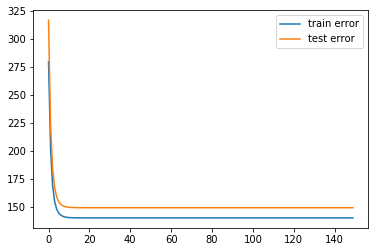

train_error 140.58991886300765 test error 149.7176584848317


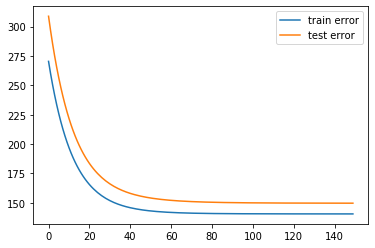

train_error 174.25781646241452 test error 194.8396484091167


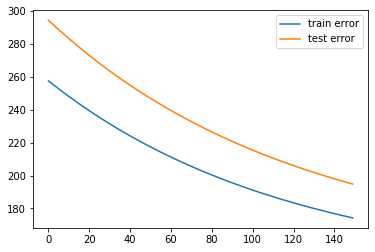

In [65]:
for lr in [.1,.01,.001]:
    GradientDescent(X, y_train, Xt, y_test, epochs=150, lr=lr, alpha=1)

train_error 140.58954912266336 test error 149.71885988462503


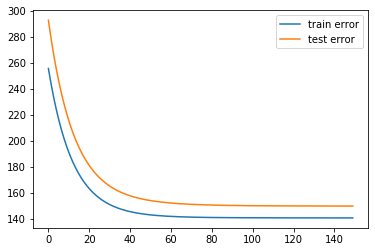

train_error 120.67952954268786 test error 127.72059157853516


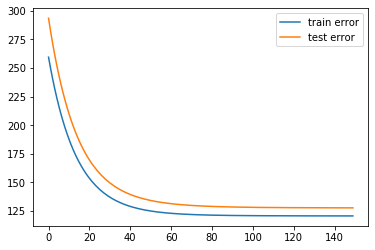

train_error 94.38147762287086 test error 99.2135202014023


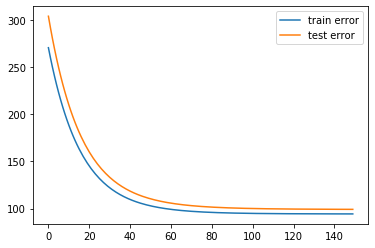

train_error 57.9283904150962 test error 60.624532412921795


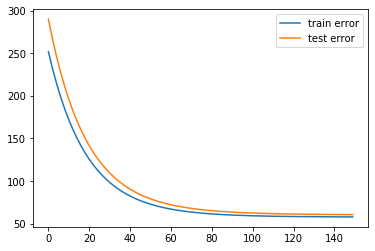

In [66]:
for alpha in [1,.75,.5,.25]:
    GradientDescent(X, y_train, Xt, y_test, epochs=150, lr=.01, alpha=alpha)